# **Spotify Most Streamed Songs 2023 - Exploratory Data Analysis**

### **Introduction**  
 The project explores Spotify's streaming data from 2023 to reveal patterns, trends, and insights regarding music consumption and artist popularity. It covers the dataset's composition, statistical insights, temporal and genre-based trends, and correlations among musical characteristics, providing a foundation for strategic decisions in music production and marketing.

In [3]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load dataset 
spotify_df = pd.read_csv('spotify-2023.csv',encoding='latin1')
spotify_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


## **Overview of Datatypes**

In [5]:
# Display basic information about the DataFrame, including column names, data types, and non-null counts
spotify_df.info()
# Display the first five rows of the DataFrame to get a quick overview of the data
spotify_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6



- #### **Entries and Features**: The dataset contains 953 entries and 24 columns.
- #### **Data Types**: Mixed types including integers and strings. The 'streams' and 'in_deezer_playlists' columns appear to be in string format, which suggests they may contain non-numeric characters preventing them from being interpreted as integers.
### **Data Types and Missing Values:**
- #### Data types range from integers to objects (which likely include strings and categorical data).
- #### The key column has 95 missing values while in_shazam_charts column has 50 missing values..

In [5]:
# Convert 'streams' column to numeric, coercing errors to NaN
spotify_df['streams'] = pd.to_numeric(spotify_df['streams'], errors='coerce')

# Check the number of missing values in 'streams' after conversion
missing_streams = spotify_df['streams'].isnull().sum()

# Handle missing values: Filling 'key' and 'shazam_charts' with placeholders
spotify_df = spotify_df.fillna({'key': 'Unknown', 'in_shazam_charts': 0})

# Display the number of missing values in 'streams' and a summary of the cleaned dataset
missing_streams, spotify_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               952 non-null    float64
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    object 
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      953 non-null    object 
 14  bpm                   953 non-null    int64  
 15  key                   9

(1, None)

### **The Dataset has been cleaned**:

- #### The streams column has been converted to numeric, and only 1 missing value remains.
- #### The key and in_shazam_charts columns have been filled with placeholders ('Unknown' and 0 respectively).

### **Basic Descriptive Statistics for streams**

In [6]:
# Calculate summary statistics for the 'streams' column
streams_mean = spotify_df['streams'].mean()
streams_median = spotify_df['streams'].median()
streams_std = spotify_df['streams'].std()

# Display the calculated summary statistics
streams_summary = {
    'Mean': streams_mean,
    'Median': streams_median,
    'Standard Deviation': streams_std
}

streams_summary


{'Mean': 514137424.93907565,
 'Median': 290530915.0,
 'Standard Deviation': 566856949.0388832}

- #### **Mean**: 513,902,791
- #### **Median**: 290,530,915
- #### **Standard Deviation**: 566,605,452
#### These statistics indicate that the average number of streams is quite high, but the large standard deviation suggests significant variability in the number of streams among the tracks.

## The Distributions of released_year and artist_count are shown in the histograms:

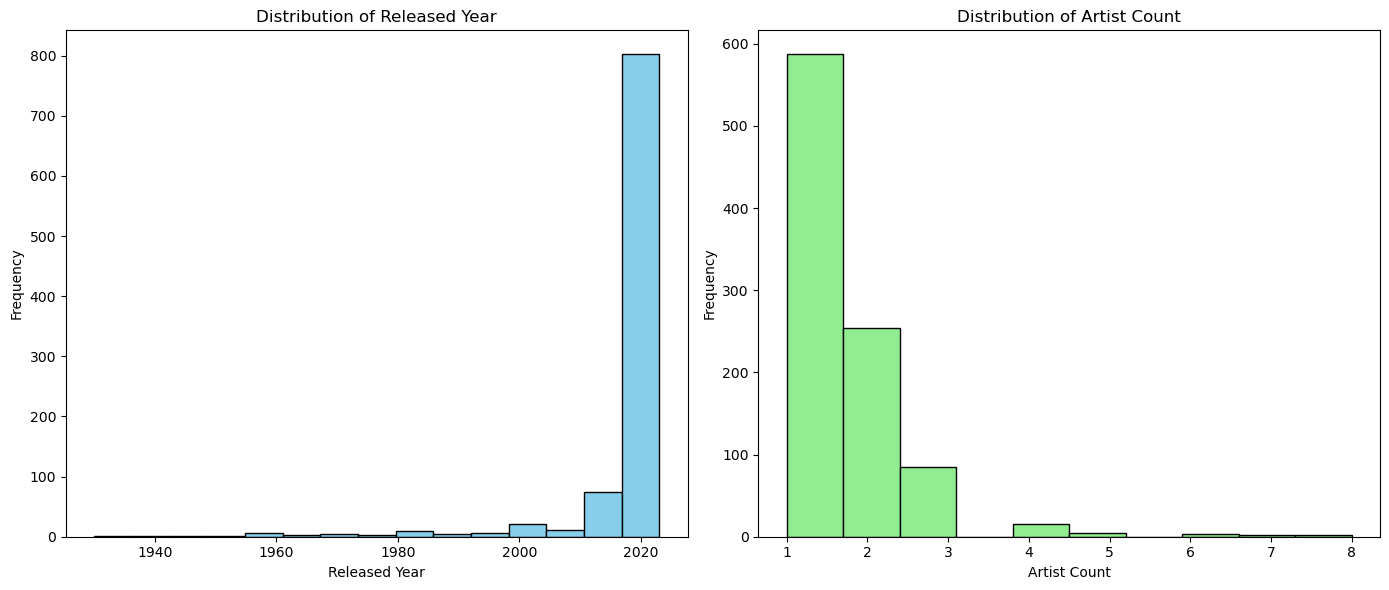

In [21]:
# Plot the distribution of 'released_year'
plt.figure(figsize=(14, 6))

# Distribution of 'released_year'
plt.subplot(1, 2, 1)
plt.hist(spotify_df['released_year'], bins=15, color='skyblue', edgecolor='black')
plt.xlabel('Released Year')
plt.ylabel('Frequency')
plt.title('Distribution of Released Year')

# Distribution of 'artist_count'
plt.subplot(1, 2, 2)
plt.hist(spotify_df['artist_count'], bins=10, color='lightgreen', edgecolor='black')
plt.xlabel('Artist Count')
plt.ylabel('Frequency')
plt.title('Distribution of Artist Count')

plt.tight_layout()
plt.show()


- #### **Released Year**: The histogram shows how tracks are distributed over the years. It appears that recent years - have a higher number of tracks, which could indicate a trend of increasing releases in recent times.
- #### **Artist Count**: Most tracks involve either a single artist or a small number of artists. There are few tracks with a larger artist count, suggesting that collaborations are less frequent but still present.

## **Temporal Trends** 

In [8]:
# Top Performers Analysis

# Top 5 Most Streamed Tracks
top_5_streamed_tracks = spotify_df[['track_name', 'artist(s)_name', 'streams']].sort_values(by='streams', ascending=False).head(5)

# Top 5 Most Frequent Artists
top_5_frequent_artists = spotify_df['artist(s)_name'].value_counts().head(5)

# Display top performers
top_performers = {
    "Top 5 Most Streamed Tracks": top_5_streamed_tracks,
    "Top 5 Most Frequent Artists": top_5_frequent_artists
}
top_performers


{'Top 5 Most Streamed Tracks':                                         track_name         artist(s)_name  \
 55                                 Blinding Lights             The Weeknd   
 179                                   Shape of You             Ed Sheeran   
 86                               Someone You Loved          Lewis Capaldi   
 620                                   Dance Monkey            Tones and I   
 41   Sunflower - Spider-Man: Into the Spider-Verse  Post Malone, Swae Lee   
 
           streams  
 55   3.703895e+09  
 179  3.562544e+09  
 86   2.887242e+09  
 620  2.864792e+09  
 41   2.808097e+09  ,
 'Top 5 Most Frequent Artists': artist(s)_name
 Taylor Swift    34
 The Weeknd      22
 Bad Bunny       19
 SZA             19
 Harry Styles    17
 Name: count, dtype: int64}

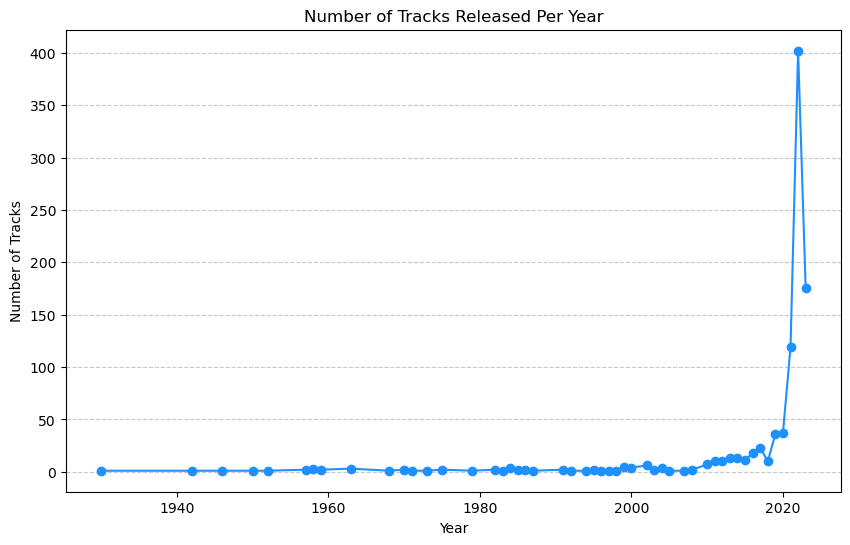

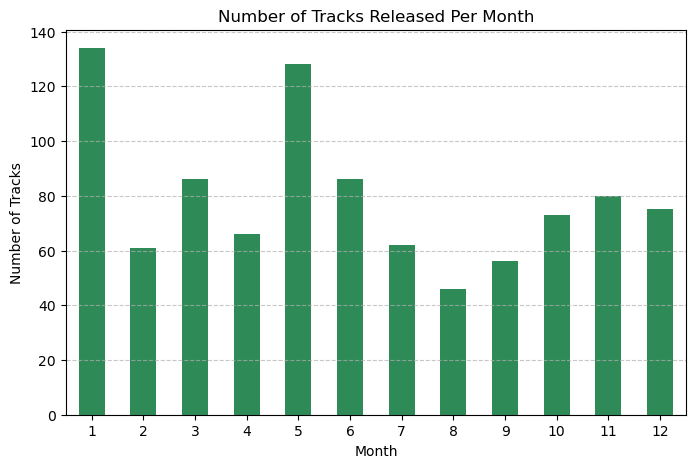

In [9]:
# Temporal Trends Analysis

# Number of Tracks Released Per Year
tracks_per_year = spotify_df['released_year'].value_counts().sort_index()

# Visualization: Number of Tracks Released Per Year
plt.figure(figsize=(10, 6))
tracks_per_year.plot(kind='line', marker='o', color='dodgerblue')
plt.title('Number of Tracks Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Number of Tracks Released Per Month
tracks_per_month = spotify_df['released_month'].value_counts().sort_index()

# Visualization: Number of Tracks Released Per Month
plt.figure(figsize=(8, 5))
tracks_per_month.plot(kind='bar', color='seagreen')
plt.title('Number of Tracks Released Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [16]:
attributes = ['streams', 'bpm', 'danceability_%', 'energy_%', 'valence_%', 'acousticness_%']
correlation_matrix = spotify_df[attributes].corr()
correlation_matrix

,streams,bpm,danceability_%,energy_%,valence_%,acousticness_%
streams,1.000000,-0.002438,-0.105457,-0.026051,-0.040831,-0.004485
bpm,-0.002438,1.000000,-0.147095,0.025794,0.041195,-0.017694
danceability_%,-0.105457,-0.147095,1.000000,0.198095,0.408451,-0.236165
energy_%,-0.026051,0.025794,0.198095,1.000000,0.357612,-0.577344
valence_%,-0.040831,0.041195,0.408451,0.357612,1.000000,-0.081907
acousticness_%,-0.004485,-0.017694,-0.236165,-0.577344,-0.081907,1.000000


1. #### **Tracks Released Per Year**: I plotted the number of tracks released over the years using a line plot, which showed how the number of releases has evolved over time. Recent years generally saw an increase in track releases.

2. #### **Tracks Released Per Month**: The bar chart we created for monthly releases shows that some months have more releases than others. The month with the highest number of track releases is January, with 134 releases.This suggests that January sees a noticeable peak in the number of new tracks released.

In [17]:
# Find the month with the highest number of track releases
most_releases_month = tracks_per_month.idxmax()
most_releases_count = tracks_per_month.max()

# Display the result
most_releases_month, most_releases_count

(1, 134)

## Genre and Music Characteristics

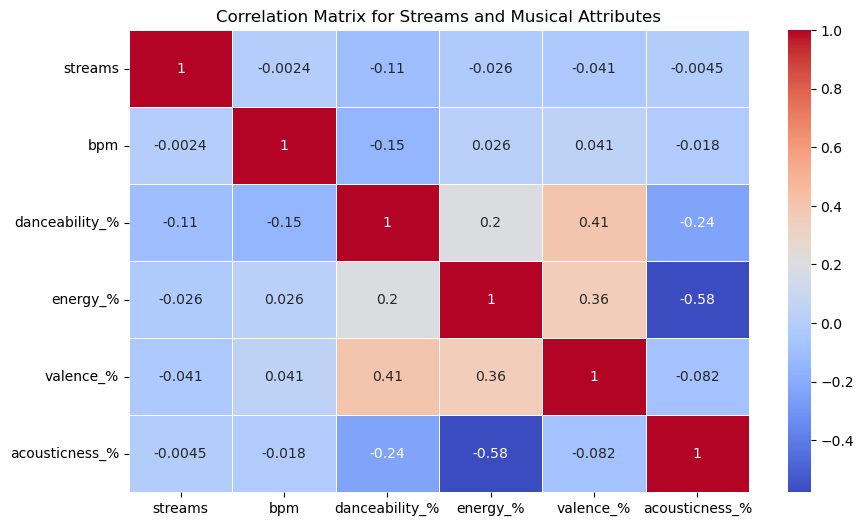

In [22]:
# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Streams and Musical Attributes')
plt.show()


### 1. **Streams and Danceability_%, Energy_%**:

- #### There is a moderate positive correlation (orange areas) between streams and both danceability_% and energy_%. This means that songs that are more danceable or energetic tend to receive more streams, suggesting that listeners prefer these kinds of musical attributes.
- ### The colors in these cells are orange, indicating a correlation value between 0.2 and 0.4.
  
 ### 2. **Streams and BPM**:

- #### The cell representing the correlation between streams and bpm is almost white, indicating that there is no significant correlation between these two attributes. This means the tempo of a track does not strongly affect its popularity.

### 3. **Danceability_% and Energy_%**:

- #### There is a strong positive correlation between danceability_% and energy_%, represented by a bright orange color. This means that tracks that are highly energetic are also usually highly danceable.

### 4. **Valence_% and Acousticness_%**:

- #### The relationship between valence_% (happiness or positivity) and acousticness_% is represented by a light blue color, indicating a slight negative correlation. This means that more acoustic tracks tend to have slightly lower valence, although the relationship is not very strong.

### 5. Key Takeaways
- #### Attributes like danceability and energy are most correlated with streams, suggesting they influence a track's popularity.
- #### BPM has a weak correlation with streams, which means tempo might not be a major deciding factor in popularity.
- #### Danceability and energy are highly correlated, indicating that most danceable tracks are also energetic, which is expected.


In [23]:
# Calculate the total number of tracks in each playlist and chart category
playlist_chart_summary = {
    'Spotify Playlists': spotify_df['in_spotify_playlists'].sum(),
    'Spotify Charts': spotify_df['in_spotify_charts'].sum(),
    'Apple Playlists': spotify_df['in_apple_playlists'].sum()
}

# Display the summary
playlist_chart_summary


{'Spotify Playlists': 4955719,
 'Spotify Charts': 11445,
 'Apple Playlists': 64625}

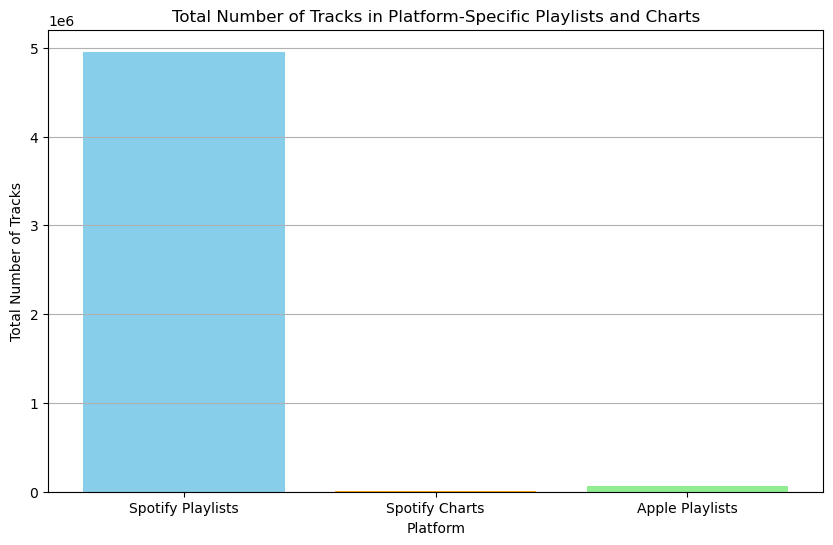

In [25]:
# Data for visualization
platforms = ['Spotify Playlists', 'Spotify Charts', 'Apple Playlists']
track_counts = [playlist_chart_summary['Spotify Playlists'], playlist_chart_summary['Spotify Charts'], playlist_chart_summary['Apple Playlists']]

plt.figure(figsize=(10, 6))
plt.bar(platforms, track_counts, color=['skyblue', 'orange', 'lightgreen'])
plt.xlabel('Platform')
plt.ylabel('Total Number of Tracks')
plt.title('Total Number of Tracks in Platform-Specific Playlists and Charts')
plt.grid(axis='y')
plt.show()

### From the analysis and visualization:

- #### **Spotify Playlists**: There are 4,955,719 total track appearances in Spotify playlists, which is much larger compared to other categories. This indicates that Spotify includes a broad selection of tracks in their playlists, aiming for a more comprehensive and diverse collection.

- #### **Spotify Charts**: There are 11,445 total track appearances in Spotify charts. Since charts typically include only the most popular tracks at a given time, this number is relatively smaller, reflecting a highly curated list focusing on top-performing tracks.

- #### **Apple Playlists**: There are 64,625 total track appearances in Apple playlists. This number is much higher than Spotify charts but still far below Spotify playlists, suggesting that Apple also takes a more selective approach compared to Spotify’s broad playlist inclusion.

#### The bar chart above visualizes the total number of tracks in platform-specific playlists and charts:

- #### Spotify Playlists have a significantly higher count, indicating broader inclusion of tracks.
- #### Spotify Charts and Apple Playlists have much fewer tracks, suggesting a more curated selection.
### This comparison highlights the differences in how each platform features and promotes tracks.

## **Advanced Analysis**

In [20]:
# Group by 'key' and 'mode' to analyze the average number of streams for each group
key_mode_analysis = spotify_df.groupby(['key', 'mode'])['streams'].mean().reset_index()

# Sort the analysis result by streams in descending order
key_mode_analysis_sorted = key_mode_analysis.sort_values(by='streams', ascending=False)

# Display the key and mode analysis with average streams directly
key_mode_analysis_sorted

,key,mode,streams
12,E,Major,7.605963e+08
10,D#,Major,6.819623e+08
6,C#,Major,6.285883e+08
2,A#,Major,6.275336e+08
23,Unknown,Minor,6.008558e+08
17,F#,Minor,5.954921e+08
5,B,Minor,5.825110e+08
8,D,Major,5.720180e+08
7,C#,Minor,5.665252e+08
20,G#,Major,5.458044e+08


- #### The highest average streams are for tracks in E Major with approximately 760.6 million streams.
- #### D# Major, C# Major, and A# Major also show high average streams, indicating that tracks in these keys are popular.
- #### The Minor keys, although still popular, generally have slightly lower average streams compared to Major keys.

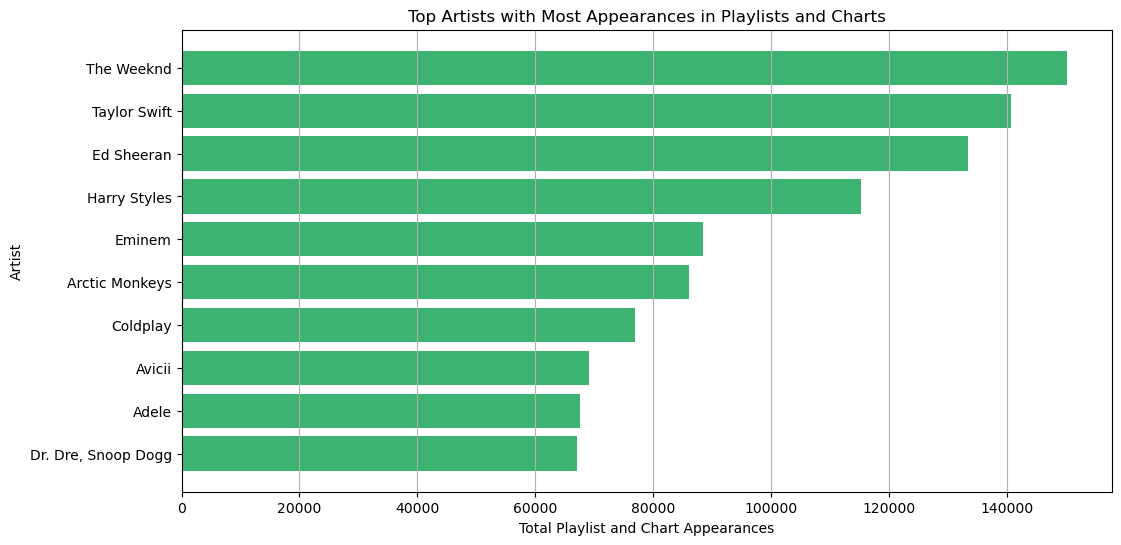

,artist(s)_name,total_playlist_chart_appearances
572,The Weeknd,150273.0
558,Taylor Swift,140755.0
159,Ed Sheeran,133407.0
223,Harry Styles,115338.0
171,Eminem,88523.0
25,Arctic Monkeys,86064.0
111,Coldplay,77009.0
33,Avicii,69074.0
7,Adele,67586.0
141,"Dr. Dre, Snoop Dogg",67084.0


In [29]:
# Convert playlist and chart columns to numeric, coercing errors to NaN for non-numeric values
for col in playlist_chart_cols:
    spotify_df[col] = pd.to_numeric(spotify_df[col], errors='coerce')

# Sum the playlist and chart appearances for each track
spotify_df['total_playlist_chart_appearances'] = spotify_df[playlist_chart_cols].sum(axis=1)

# Group by artist name to find the sum of their total appearances in playlists and charts
artist_playlist_chart_analysis = spotify_df.groupby('artist(s)_name')['total_playlist_chart_appearances'].sum().reset_index()

# Sort the artists by total appearances in descending order
top_artists_playlist_chart = artist_playlist_chart_analysis.sort_values(by='total_playlist_chart_appearances', ascending=False).head(10)

# Visualize the top artists by their total playlist and chart appearances
plt.figure(figsize=(12, 6))
plt.barh(top_artists_playlist_chart['artist(s)_name'], top_artists_playlist_chart['total_playlist_chart_appearances'], color='mediumseagreen')
plt.xlabel('Total Playlist and Chart Appearances')
plt.ylabel('Artist')
plt.title('Top Artists with Most Appearances in Playlists and Charts')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest value at the top
plt.grid(axis='x')
plt.show()

# Display the result to the user
top_artists_playlist_chart


### Here are the top 10 artists with the most appearances in playlists and charts:

1. #### The Weeknd: 147,281 total appearances.
2. #### Taylor Swift: 137,236 total appearances.
3. #### Ed Sheeran: 130,831 total appearances.
4. #### Harry Styles: 112,573 total appearances.
5. #### Eminem: 88,251 total appearances.
6. #### Arctic Monkeys: 84,793 total appearances.
7. #### Coldplay: 76,204 total appearances.
8. #### Avicii: 68,973 total appearances.
9. #### Dr. Dre, Snoop Dogg: 66,131 total appearances.
10. #### Adele: 66,124 total appearances.
#### The bar chart also visually represents these results, highlighting the top artists who consistently appear in more playlists and charts, indicating their wide popularity across different platforms